# Computer Vision

Dr. José Gerardo Tamez Peña  
Kevin Islas Abud
A01372023  
November 5, 2018

## Classifiers Validation

## Load data

In [1]:
import pandas as pd

db = pd.read_csv("sonar.all-data.csv", header=None)
x = db.drop(60, axis=1)
y = db[60]
print(x.head())

#Label encode 
from sklearn import preprocessing
labelEncoder = preprocessing.LabelEncoder()
labelEncoder.fit(y)
print(labelEncoder.classes_)
yEncoded = labelEncoder.transform(y)

print(x.shape)
print(y.shape)

x = x.values
y = yEncoded


       0       1       2       3       4       5       6       7       8   \
0  0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   

       9    ...        50      51      52      53      54      55      56  \
0  0.2111   ...    0.0232  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180   
1  0.2872   ...    0.0125  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140   
2  0.6194   ...    0.0033  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316   
3  0.1264   ...    0.0241  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050   
4  0.4459   ...    0.0156  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072   

       57      58      59  
0  0.0084  0.0090  0.0032  
1  0.0049  0.0052 

In [2]:
results = {}

In [3]:
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
def getModels():
    models = {}
    models["SVC"] = svm.SVC()
    models["NaiveBayes"] = GaussianNB()
    models["LDA"] = LinearDiscriminantAnalysis(solver="svd")
    models["KNN"] = KNeighborsClassifier()
    return models

## Leave One Out

In [4]:
from sklearn.model_selection import LeaveOneOut
import numpy as np
def ScoreUsingLOO(model):

    loo = LeaveOneOut()
    samples = loo.get_n_splits(x)
    points = 0
    for train_index, test_index in loo.split(x):
        xTrain, xTest = x[train_index],  x[test_index]
        yTrain, yTest = y[train_index], y[test_index]


        model.fit(xTrain, yTrain)
        points += model.score(xTest, yTest)

    return points/samples

SVC 0.668269230769
NaiveBayes 0.673076923077
LDA 0.754807692308
KNN 0.826923076923


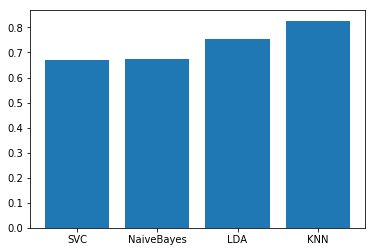

In [5]:
models = getModels()
results["LOO"] = {}
for model in models.keys():
    results["LOO"][model] = ScoreUsingLOO(models[model])
    print(model, results["LOO"][model])


import matplotlib.pyplot as plt
plt.bar(range(len(results["LOO"])), list(results["LOO"].values()))
plt.xticks(range(len(results["LOO"])), list(results["LOO"].keys()))
plt.show()

## Cross Validation

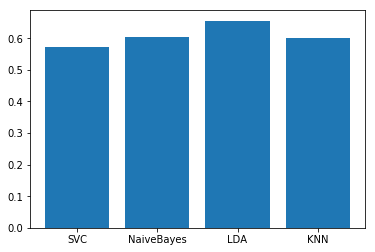

In [6]:
from sklearn.model_selection import cross_val_score
models = getModels()
results["Cross_Validation"] = {}
for model in models.keys():
    results["Cross_Validation"][model] = np.mean(cross_val_score(models[model], x, y, cv=10))

import matplotlib.pyplot as plt
plt.bar(range(len(results["Cross_Validation"])), list(results["Cross_Validation"].values()))
plt.xticks(range(len(results["Cross_Validation"])), list(results["Cross_Validation"].keys()))
plt.show()

## Bootstrap

In [7]:
from sklearn.model_selection import ShuffleSplit

def bootstrap(model):
    
    perf = []
    rs = ShuffleSplit(n_splits=5, test_size=.20, random_state=0)
    for train_index, test_index in rs.split(x):
        xTrain, xTest = x[train_index],  x[test_index]
        yTrain, yTest = y[train_index], y[test_index]


        model.fit(xTrain, yTrain)
        perf.append(model.score(xTest, yTest))
    return np.mean(perf)

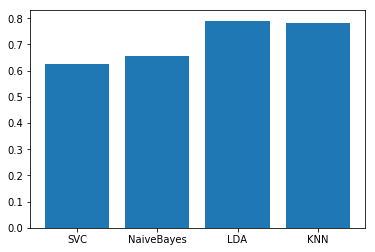

In [8]:
models = getModels()
results["Bootstrap"] = {}

for i in range(10):
    for model in models.keys():
        if(model not in results["Bootstrap"]):
            results["Bootstrap"][model] = 0
        results["Bootstrap"][model] += bootstrap(models[model])*0.1


import matplotlib.pyplot as plt
plt.bar(range(len(results["Bootstrap"])), list(results["Bootstrap"].values()))
plt.xticks(range(len(results["Bootstrap"])), list(results["Bootstrap"].keys()))
plt.show()

## Cross Validation

In [9]:
from sklearn.model_selection import train_test_split
def CrossValidation(model):
    xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.30)
    model.fit(xTrain, yTrain)
    return np.mean(model.score(xTest, yTest))

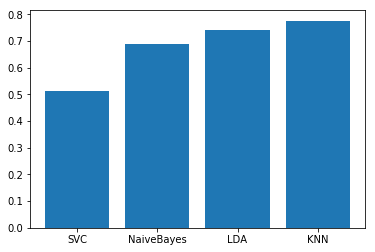

In [10]:
models = getModels()
results["Cross_Validation_Random"] = {}

for i in range(10):
    for model in models.keys():
        if(model not in results["Cross_Validation_Random"]):
            results["Cross_Validation_Random"][model] = 0
        results["Cross_Validation_Random"][model] += CrossValidation(models[model])*0.1


import matplotlib.pyplot as plt
plt.bar(range(len(results["Cross_Validation_Random"])), list(results["Cross_Validation_Random"].values()))
plt.xticks(range(len(results["Cross_Validation_Random"])), list(results["Cross_Validation_Random"].keys()))
plt.show()

## Results

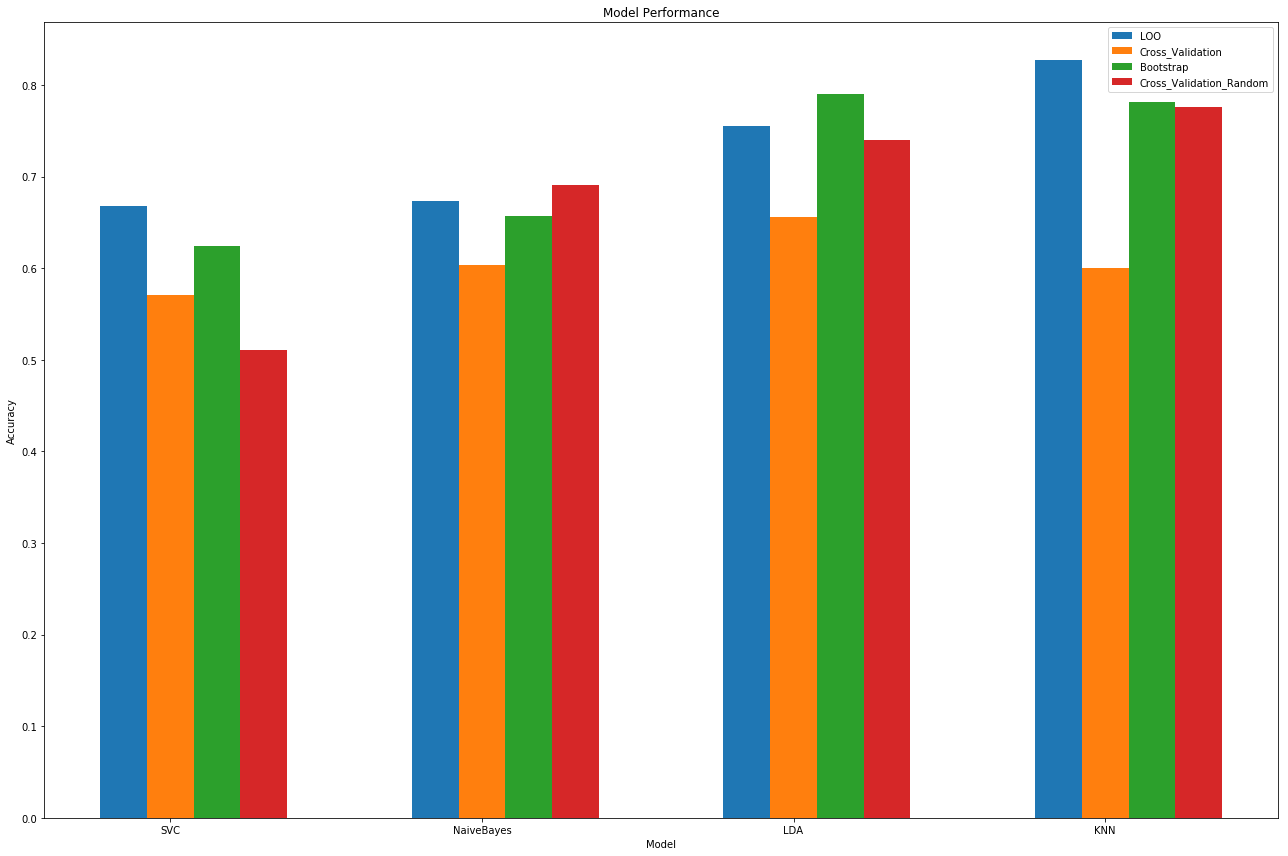

In [11]:
n_groups = len(results["Cross_Validation_Random"])
index = np.arange(n_groups)
bar_width = 0.15
plt.rcParams["figure.figsize"][0] = 18
plt.rcParams["figure.figsize"][1] = 12
keys = list(results.keys())
for i in range(len(keys)):
    experiment = keys[i]
    bar = plt.bar(index+(bar_width*i), list(results[experiment].values()), bar_width, label=experiment)
plt.xticks(index+bar_width, list(results["Cross_Validation_Random"].keys()))
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Performance")
plt.tight_layout()
plt.legend()
plt.show()
    

## Interpretation

In most validation strategies the reported performance of every model was similar, except from when using 10 fold cross validation, which reported considerably worse performance in 3 out of 4 models (most notable in the KNN model).
